# Replicates Fig 4

### Importing useful functions

In [1]:
###### to run, run: exec(open("./p_PAPER_graphs_spkAmplDecay_Python3.py").read())
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib.pylab import *
import pickle
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from copy import copy

global resol, thresh

In [2]:
thresh=0 #mV
resol=0.01#ms (min resolution of integration)


In [3]:
######Importing useful functions
exec(open("./functions/f_stimulations_simulations.py").read())
exec(open("./functions/f_plots.py").read())
exec(open("./functions/f_saving_plots.py").read())
exec(open("./functions/f_post_simulation_analysis.py").read())


In [5]:
####### This part is needed just to give a neuron structure to the generation of sim_exp (the specific model is completely irrelevant)
#Model to Analyze
s_model_abrev="MTM_W_sPNaS_sICD"
s_model="neuron_"+s_model_abrev
exec(open("./cfg/m_"+s_model_abrev+".py").read())
d_Pars=eval("Pars_"+s_model_abrev)
# #######Importing model to be used########
identifier = getattr(sys.modules[__name__], s_model)
# ############ Creating neuron
d_Pars_copy=copy(d_Pars)
neuron=identifier(d_Pars_copy)

In [6]:
## Path of the folder where the pickled dictionaries will be loaded from..
import pickle
dir_exps='./Data/Recordings/Ko_Dependent_Irregularity/'

i_s_cell='KData_close2thres_16_06_18'
cell=str(i_s_cell)
f=open(dir_exps+cell+'.pk1', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
d_Cell = u.load()


In [8]:
matplotlib.rcParams['lines.linewidth']=2.0
fig_wide=matplotlib.rcParams["figure.figsize"][0]
fig_height=matplotlib.rcParams["figure.figsize"][1]
fig_wide

5.2

/usr/lib/python3/dist-packages/ipykernel_launcher.py:663: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:56: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in greater


A180615C
Baseline
0.2625
-0.009375
A180615C
Baseline
0.265625
0.0
A180615C
High
0.125
0.0
A180615C
High
0.109375
0.0
A180615C
Wash
0.25
-0.003125
A180615C
Wash
0.24375000000000002
0.0
A180615C
Wash
0.24062499999999998
0.0


/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


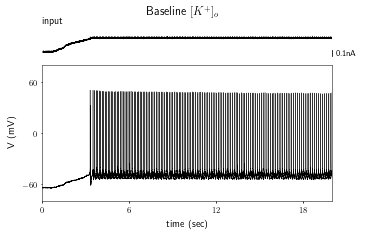

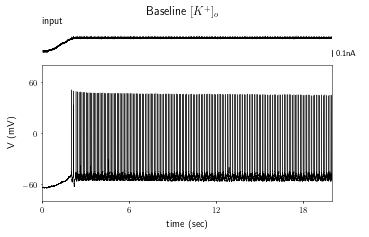

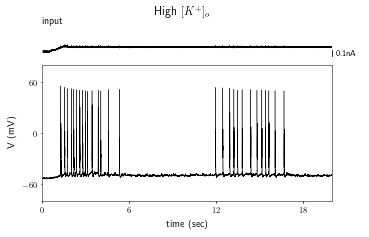

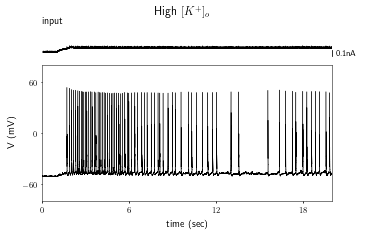

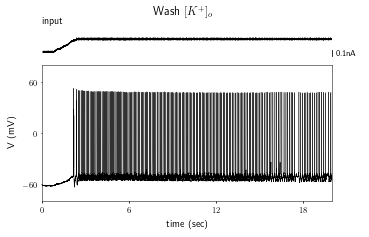

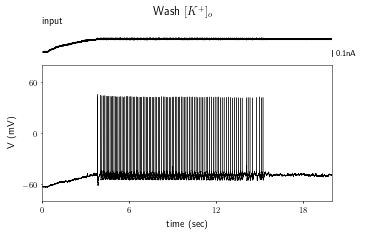

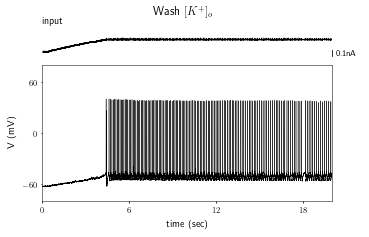

In [9]:
useful_cell={}
useful_cell['High']=['A180615B','A180529A','A180615D','A180615C','A180529C','A180615A']
useful_cell['Baseline']=['A180615B','A180529A','A180615D','A180615C','A180529C','A180615A']
useful_cell['Wash']=['A180615B','A180529A','A180615D','A180615C','A180529C','A180615A']
useful_traces={}
useful_traces['High']=[[0,1,2],[0,2],[0,1],[0,1],[0,1,2],[0,1]]
useful_traces['Baseline']=[[0,1],[0,1,2],[0,1,2],[0,1],[0,1,2],[0,1]]
useful_traces['Wash']=[[0,1,2],[0,1,2],[0,1,2,3],[0,1,2],[0,1,2],[0,1,2]]
useful_times={}
useful_times['High']=[[4500,[],[]],[[],10000],[5000,5000],[[],[]],[[],[],20000],[[],4000]]
useful_times['Baseline']=[[[],[]],[[],[],[]],[[],[],[]],[[],[],[]],[[],[],[]],[[],[]]]
useful_times['Wash']=[[[],[],[]],[[],[],[]],[[],[],[],[]],[[],[],[]],[[],20000,[]],[[],[],[]]]

#### Only considering spikes after adatation..
adapt_time=2000#Set to 0 to include all
####################################3 Plot of what is useful...
Stats_Cells={}

for s_Cell in d_Cell.keys():
    #### Finding min and max input...
    min_I=1000
    max_I=0
    s_high_or_Low=['Baseline','High','Wash']
    for si_high_or_Low in s_high_or_Low:
        if s_Cell!='s_name':
            for s_iExp in d_Cell[s_Cell].keys():
                if si_high_or_Low in s_iExp:
                    i_Exp=d_Cell[s_Cell][s_iExp]
                    c_s=0
                    i_t=[]
                    i_v=[]
                    i_I=[]
                    for s_var in i_Exp['s_vars']:
                        if 'Time' in s_var or '(s))' in s_var:
                            i_t.append(c_s)
                        if 'Voltage' in s_var or 'Vm' in s_var:
                            i_v.append(c_s)
                        if 'Current' in s_var or 'Im' in s_var:
                            i_I.append(c_s)
                        c_s+=1
                    m_t=[]
                    m_V=[]
                    m_I=[]
                    for c_s in range(len(i_v)):
                        m_t.append(i_Exp['a_vars'][:,i_t[0]]*1000)#s To ms
                        m_V.append(i_Exp['a_vars'][:,i_v[c_s]]*1000)
                        m_I.append(i_Exp['a_vars'][:,i_I[c_s]]*1e9)
                    if np.min(m_I)<min_I:
                        min_I=np.min(m_I)
                    if np.max(m_I)>max_I:
                        max_I=np.max(m_I)

    s_high_or_Low=['Baseline','High','Wash']
    for si_high_or_Low in s_high_or_Low:
        if s_Cell!='s_name':
            for s_iExp in d_Cell[s_Cell].keys():
                if si_high_or_Low in s_iExp:
                    i_Exp=d_Cell[s_Cell][s_iExp]
                    c_s=0
                    i_t=[]
                    i_v=[]
                    i_I=[]
                    for s_var in i_Exp['s_vars']:
                        if 'Time' in s_var or '(s))' in s_var:
                            i_t.append(c_s)
                        if 'Voltage' in s_var or 'Vm' in s_var:
                            i_v.append(c_s)
                        if 'Current' in s_var or 'Im' in s_var:
                            i_I.append(c_s)
                        c_s+=1
                    m_t=[]
                    m_V=[]
                    m_I=[]
                    for c_s in range(len(i_v)):
                        m_t.append(i_Exp['a_vars'][:,i_t[0]]*1000)#s To ms
                        m_V.append(i_Exp['a_vars'][:,i_v[c_s]]*1000)
                        m_I.append(i_Exp['a_vars'][:,i_I[c_s]]*1e9)
                        
                    red_samp=2
                    pres=3000
#                     ##################################################
#                     ############### First Graph ####################3
#                     #################################################3

                    for i_t in range(len(m_t)):
                        if sum(np.argwhere(np.isnan(m_t[i_t])))==0:
                            v_Iapp=m_I[i_t]
                            v_t=m_t[i_t]
                            v_V=m_V[i_t]
                        else:
                            v_Iapp=m_I[i_t][0:np.argwhere(np.isnan(m_t[i_t]))[0][0]]
                            v_t=m_t[i_t][0:np.argwhere(np.isnan(m_t[i_t]))[0][0]]
                            v_V=m_V[i_t][0:np.argwhere(np.isnan(m_t[i_t]))[0][0]]
                        t_st_stim=v_t[0]
                        time_stim=v_t[-1]
                        resol=v_t[1]-v_t[0]
                        neuron.noisy_current=np.empty(len(v_t))
                        neuron.noisy_current=v_Iapp
                        sim=organizing_experimentalData(neuron,v_t,v_V)
                        t_v=[float(i_n) for i_n in range(0,92)]
                        lt=int(len(sim.a_Results.t)*1)

                        if s_Cell=='A180615C':# or s_Cell=='A180615B':
                            size_axis_font=12
                            matplotlib.rcParams['lines.linewidth']=2.0*0.2
                            size_axis_font=matplotlib.rcParams["font.size"]
                            m_t_str=[0]
                            f7 = plt.figure(facecolor="1",figsize=(fig_wide,fig_height*0.7))
                            ax1=[];axp=[];ax0p=[];
                            ny_length_unit=1+1
                            for i_t0 in range(len(m_t_str)):
                                ax1.append(plt.subplot2grid((5,11), (0, 0), colspan=11,rowspan=1))
                                if i_t0>0:
                                    axp.append(plt.subplot2grid((5,11), (1, 0), colspan=11,rowspan=4,sharex=ax1[-1],sharey = axp[0]))
                                else:
                                    axp.append(plt.subplot2grid((5,11), (1, 0), colspan=11,rowspan=4,sharex=ax1[-1]))

                            if sum(np.argwhere(np.isnan(m_t[i_t])))==0:
                                v_Iapp=m_I[i_t]
                                v_t=m_t[i_t]
                                v_V=m_V[i_t]
                            else:
                                v_Iapp=m_I[i_t][0:np.argwhere(np.isnan(m_t[i_t]))[0][0]]
                                v_t=m_t[i_t][0:np.argwhere(np.isnan(m_t[i_t]))[0][0]]
                                v_V=m_V[i_t][0:np.argwhere(np.isnan(m_t[i_t]))[0][0]]
                            t_st_stim=v_t[0]
                            time_stim=v_t[-1]
                            resol=v_t[1]-v_t[0]
                            neuron.noisy_current=np.empty(len(v_t))
                            neuron.noisy_current=v_Iapp
                            sim=organizing_experimentalData(neuron,v_t,v_V)
                            t_v=[float(i_n) for i_n in range(0,92)]
                            lt=int(len(sim.a_Results.t)*1)
                            ####
                            #### Plot complete trace
                            b=[]
                            b=np.nonzero((sim.a_Results.t[0:lt]>t_st_stim) & (sim.a_Results.t[0:lt]<20000))
                            ax1[0].plot(sim.a_Results.t[0:lt][b][::red_samp]/1000.0, sim.c_neuron.noisy_current[0:lt][b][::red_samp],color='black')
                            print(s_Cell)
                            print(si_high_or_Low)
                            print(max(np.array(v_Iapp)))
                            print(min(np.array(v_Iapp)))
                            ax1[0].set_ylim([np.nanmin(m_I)-0.1,np.nanmax(m_I)+0.1])
                            ax1[0].set_ylim([min_I-0.1,max_I+0.1])
                            ax1[0].get_xaxis().set_visible(False)
                            ax1[0].get_yaxis().set_visible(False)

                            ax1[0].set_title('input', loc='left')
                            locatory1 = MaxNLocator(nbins=2) # with 3 bins you will have 4 ticks
                            ax1[0].yaxis.set_major_locator(locatory1)
                            ax1[0].spines['bottom'].set_color('white')
                            ax1[0].spines['top'].set_color('white')
                            ax1[0].spines['left'].set_color('white')
                            ax1[0].spines['right'].set_color('white')
                            for t in ax1[0].xaxis.get_ticklines(): t.set_color('white')
                                
                            axp[0].plot((sim.a_Results.t[0:lt][b][::red_samp]-t_st_stim)/1000.0,sim.a_Results.V[0:lt][b][::red_samp],color=[0,0,0])
                            axp[0].set_ylabel(r'V (mV)',labelpad=5)

                            axp[0].set_xlim([-10/1000.0,max(sim.a_Results.t[0:lt][b])/1000.0])
                            axp[0].set_ylim([-80,80])
                            if i_t==0:
                                axp[i_t].set_xlabel('time (sec)',labelpad=5)
                            axp[0].set_xlabel('time (sec)',labelpad=5)
                            locatory21 = MaxNLocator(nbins=3) # with 3 bins you will have 4 ticks
                            axp[0].yaxis.set_major_locator(locatory21)
                            locatory22 = MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
                            axp[0].xaxis.set_major_locator(locatory22)
                            
                            add_scale=[0.1,'0.1nA']
                            box1 =ax1[0].get_position()
                            xxpos=1.12
                            yypos=0.7
                            ob = AnchoredHScaleBarY(ax=ax1[0],size=add_scale[0], label=add_scale[1],bbox_to_anchor=(xxpos,yypos), bbox_transform=ax1[0].transAxes, loc="upper right", frameon=False,
                                           pad=0.6,sep=4, linekw=dict(color="k", linewidth=0.8))

                            ax1[0].add_artist(ob)
        
                            
                            f7.suptitle(si_high_or_Low+r' $[K^{+}]_o$',fontsize=matplotlib.rcParams["font.size"])
